In [1]:
# Import necessary libraries
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from model.maxsr_tiny import MaxSRTiny
from model.maxsr_super_tiny import MaxSRSuperTiny
from utils.utils import load_config, load_image
from utils.plotting import tensor_to_RGB_image
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

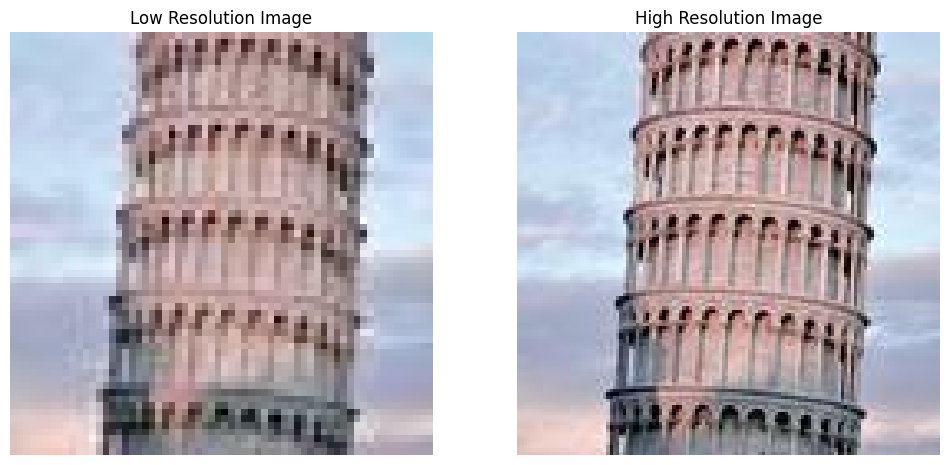

In [2]:
# Load the images
lr_image_path = '/home/linuxu/Documents/datasets/Tiny_LR/21.jpeg'  
hr_image_path = '/home/linuxu/Documents/datasets/Tiny_HR/21.jpeg'  

lr_image = Image.open(lr_image_path)
hr_image = Image.open(hr_image_path)

# Plot the images side by side
plt.figure(figsize=(12, 6))

# Plot Low Resolution Image
plt.subplot(1, 2, 1)
plt.imshow(lr_image)
plt.title('Low Resolution Image')
plt.axis('off')

# Plot High Resolution Image
plt.subplot(1, 2, 2)
plt.imshow(hr_image)
plt.title('High Resolution Image')
plt.axis('off')

plt.show()

## Transform Low resolution Image to tensor

In [3]:
# Transform the image to tensor
transform = transforms.ToTensor()
image_tensor = transform(lr_image).unsqueeze(0)

# Output the shape of the tensor
print(f'The shape of the low resolution tensor is: {image_tensor.shape}')

The shape of the low resolution tensor is: torch.Size([1, 3, 64, 64])


# Inference - MaxSR-Super-Tiny

In [4]:
super_tiny_config = load_config(os.path.join(os.getcwd(), "config", "maxsr_super_tiny.yaml"))
super_tiny_config = super_tiny_config["model_config"]

# Load the pre-trained weights onto the correct device
super_tiny_model = MaxSRSuperTiny(super_tiny_config)

# Load the pre-trained weights
model_path = "/home/linuxu/Documents/models/MaxSR-super-tiny/20240820_160331/checkpoints/model-epoch-452.pth"
super_tiny_model.load_state_dict(torch.load(model_path, map_location=device))
super_tiny_model = super_tiny_model.to(device)

In [7]:
super_tiny_model.eval()

In [8]:
with torch.no_grad():
    image = load_image(lr_image_path).to(device)
    output_image = super_tiny_model(image)

output_image.shape

In [15]:
super_tiny_tensor = tensor_to_RGB_image(output_image)

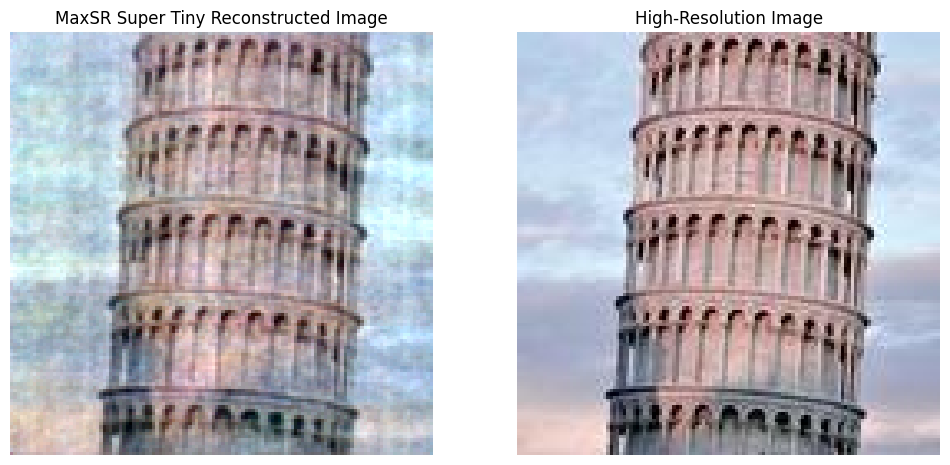

In [24]:
reconstructed_super_tiny_image = Image.fromarray(super_tiny_tensor)

# Plot the images side by side
plt.figure(figsize=(12, 6))

# Plot Reconstructed Image
plt.subplot(1, 2, 1)
plt.imshow(reconstructed_super_tiny_image)
plt.title('MaxSR Super Tiny Reconstructed Image')
plt.axis('off')

# Plot High-Resolution Image
plt.subplot(1, 2, 2)
plt.imshow(hr_image)
plt.title('High-Resolution Image')
plt.axis('off')

plt.show()


# Low Resolution vs MaxSR Super Tiny results

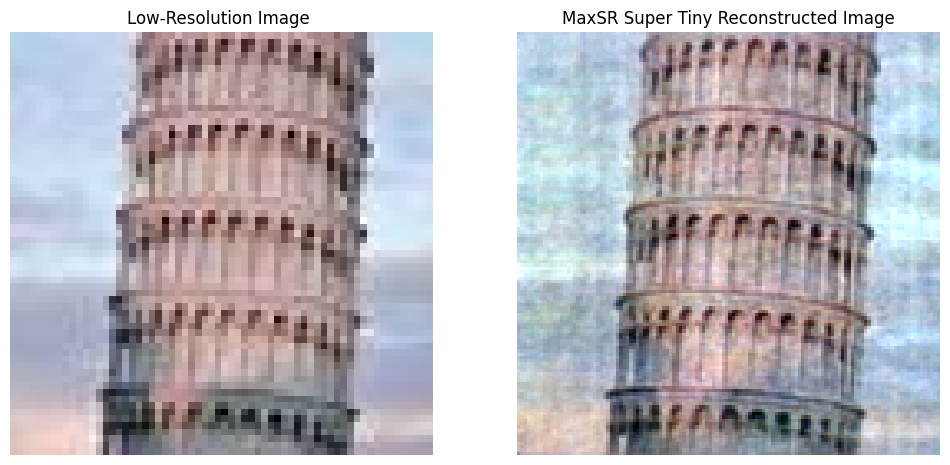

In [18]:
# Plot the images side by side
plt.figure(figsize=(12, 6))

# Plot Reconstructed Image
plt.subplot(1, 2, 1)
plt.imshow(lr_image)
plt.title('Low-Resolution Image ')
plt.axis('off')

# Plot High-Resolution Image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_super_tiny_image)
plt.title('MaxSR Super Tiny Reconstructed Image')
plt.axis('off')

plt.show()


# Inference - MaxSR-Tiny

In [25]:
tiny_config = load_config(os.path.join(os.getcwd(), "config", "maxsr_tiny.yaml"))
tiny_config = tiny_config["model_config"]

# Load the pre-trained weights onto the correct device
tiny_model = MaxSRTiny(tiny_config)

# Load the pre-trained weights
model_path = "/home/linuxu/Documents/models/MaxSR-tiny/20240820_163825/checkpoints/model-epoch-340.pth"
tiny_model.load_state_dict(torch.load(model_path, map_location=device))
tiny_model = tiny_model.to(device)

In [26]:
tiny_model.eval()

MaxSRTiny(
  (sfe): ShallowFeatureExtractor(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (patch_embeddings): Linear(in_features=4096, out_features=256, bias=True)
  (positional_embedding): PositionalEmbedding()
  (stages): ModuleList(
    (0-3): 4 x Sequential(
      (0): AdaptiveMaxViTBlock(
        (mbconv): MBConv(
          (expand_conv): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1))
          (depthwise_conv): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=1024)
          (se_reduce): Conv2d(1024, 64, kernel_size=(1, 1), stride=(1, 1))
          (se_expand): Conv2d(64, 1024, kernel_size=(1, 1), stride=(1, 1))
          (project_conv): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
          (norm1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (norm2): BatchNorm2d(1024, eps=1

In [27]:
with torch.no_grad():
    image = load_image(lr_image_path).to(device)
    tiny_output_image = tiny_model(image)

tiny_output_image.shape

torch.Size([1, 3, 128, 128])

In [28]:
tiny_tensor = tensor_to_RGB_image(tiny_output_image)

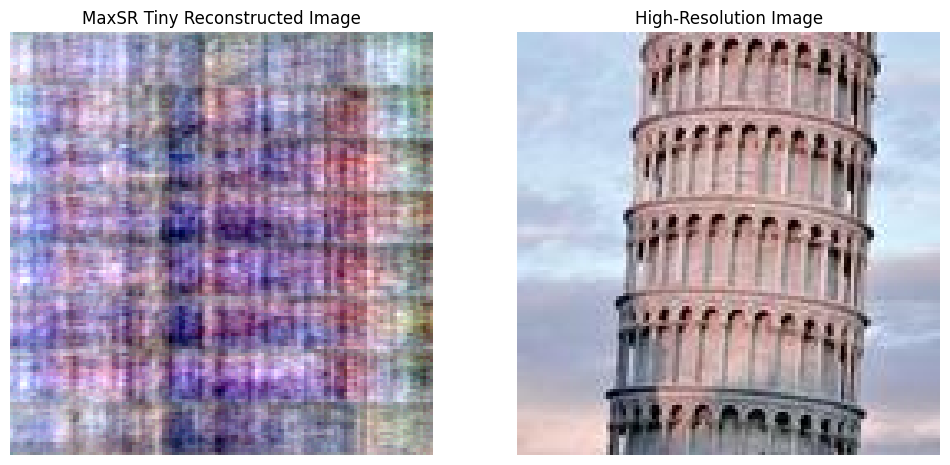

In [29]:
reconstructed_tiny_image = Image.fromarray(tiny_tensor)

# Plot the images side by side
plt.figure(figsize=(12, 6))

# Plot Reconstructed Image
plt.subplot(1, 2, 1)
plt.imshow(reconstructed_tiny_image)
plt.title('MaxSR Tiny Reconstructed Image')
plt.axis('off')

# Plot High-Resolution Image
plt.subplot(1, 2, 2)
plt.imshow(hr_image)
plt.title('High-Resolution Image')
plt.axis('off')

plt.show()
